YlGnBu-8
8 colors palette
    1. #ffffd9
    2. #edf8b1
    3. #c7e9b4
    4. #7fcdbb
    5. #41b6c4
    6. #1d91c0
    7. #225ea8
    8. #0c2c84

Touch frequency kiss last week
Touch frequency put arm around shoulder last week
Touch frequency intimate hug last week

How often have you and your partner touched each other in this way in the last week?


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from functools import reduce
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

pd.options.mode.chained_assignment = None
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Read data (output from FReDA_Touch_genVariables_final.do)
df = pd.read_csv('source/FReDA.csv')

In [3]:
# Variables to map columns
# New values are assigned as "in-between" values to ease plotting and calculations
overall_options = {
    "index_options": {
        '0x': 0,
        '1-5x': 1,
        '6-10x': 2,
        '11-20x': 3,
        '21-50x': 4,
        '> 50x': 5
    },
    "omo_options": {
        'Not at all': 0,
        '1 to 5 times': 1,
        '6 to 10 times': 2,
        '11 to 20 times': 3,
        '21 to 50 times': 4,
        'More than 50 times': 5
    },
    "satisfaction_options": {
        '0 - Not at all satisfied': 0,
        '1': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5': 5,
        '6': 6,
        '7': 7,
        '8': 8,
        '9': 9,
        '10 - Completely satisfied': 10
    },
    "duration_options": {
        '0-2': 1,
        '3-5': 2,
        '6-10': 3,
        '11-20': 4,
        '21+': 5,
    }
}

In [4]:
rename_columns = {
    'omo15i1_w2b': 'Anchor kiss (E)',
    'omo15i2_w2b': 'Anchor kiss (D)',
    'pomo15i1_w2b': 'Partner kiss (E)',
    'pomo15i2_w2b': 'Partner kiss (D)',
    'omo16i1_w2b': 'Anchor hold (E)',
    'omo16i2_w2b': 'Anchor hold (D)',
    'pomo16i1_w2b': 'Partner hold (E)',
    'pomo16i2_w2b': 'Partner hold (D)',
    'omo17i1_w2b': 'Anchor intimacy (E)',
    'omo17i2_w2b': 'Anchor intimacy (D)',
    'pomo17i1_w2b': 'Partner intimacy (E)',
    'pomo17i2_w2b': 'Partner intimacy (D)',
    'relsat': 'Anchor relationship satisfaction',
    'relint': 'Anchor communication quality',
    'lifsat': 'Anchor life satisfaction',
    'prelsat': 'Partner relationship satisfaction',
    'prelint': 'Partner communication quality',
    'plifsat': 'Partner life satisfaction',
    'agediff_class': 'Age difference',
    'nkidsliv_class': 'Kids',
    'age': 'Anchor age',
    'page': 'Partner age'
}

# Rename some columns to ease understanding
df = df.rename(
    columns=rename_columns
)

"The three scales "Intimacy" [Intimität], "Apreciation" [Wertschätzung], and "Conflict" [Konflikt] were adapted from the "Network of Relationships Inventory (NRI)" (Furman & Buhrmester, 1985) and used in an abbreviated form and adapted by pairfam and Freda (Hank et al. 2024)."

(more detailed: In contrast to the original version of the NRI, the questions in this version were asked only concerning the relationship with the partner, and not to any other persons with whom the respondent has a relationship. Furthermore, to limit the volume of data collected, the individual scales have been shortened from three to two items each. The response format has five stages, as did the original, but in this version they reflect frequency (1=Never to 5=Very frequently).)

In [5]:
# Create columns for speed
df['age-group (Anchor)'] = None
df['age-group (Partner)'] = None

# Map target columns
# This will change categorical values such as '0-2' or '3-5' to numerical values: 1,2,3,etc...
df['Anchor relationship satisfaction'] = df['Anchor relationship satisfaction'].map(
    overall_options["satisfaction_options"])
df['Partner relationship satisfaction'] = df['Partner relationship satisfaction'].map(
    overall_options["satisfaction_options"])
df['Anchor life satisfaction'] = df['Anchor life satisfaction'].map(overall_options["satisfaction_options"])
df['Partner life satisfaction'] = df['Partner life satisfaction'].map(overall_options["satisfaction_options"])

df['Anchor kiss (E)'] = df['Anchor kiss (E)'].map(overall_options["omo_options"])
df['Anchor hold (E)'] = df['Anchor hold (E)'].map(overall_options["omo_options"])
df['Anchor intimacy (E)'] = df['Anchor intimacy (E)'].map(overall_options["omo_options"])
df['Anchor kiss (D)'] = df['Anchor kiss (D)'].map(overall_options["omo_options"])
df['Anchor hold (D)'] = df['Anchor hold (D)'].map(overall_options["omo_options"])
df['Anchor intimacy (D)'] = df['Anchor intimacy (D)'].map(overall_options["omo_options"])

df['Partner kiss (E)'] = df['Partner kiss (E)'].map(overall_options["omo_options"])
df['Partner hold (E)'] = df['Partner hold (E)'].map(overall_options["omo_options"])
df['Partner intimacy (E)'] = df['Partner intimacy (E)'].map(overall_options["omo_options"])
df['Partner kiss (D)'] = df['Partner kiss (D)'].map(overall_options["omo_options"])
df['Partner hold (D)'] = df['Partner hold (D)'].map(overall_options["omo_options"])
df['Partner intimacy (D)'] = df['Partner intimacy (D)'].map(overall_options["omo_options"])

df['Relationship length'] = df['reldur_class'].map(overall_options["duration_options"])


In [6]:
# delete those with no relationship duration data
df = df[df['reldur_class'] != '.']
df = df.dropna(subset=["reldur_class"]).reset_index(drop=True)

In [7]:
# Group anchor and partner by age
for i in range(0, len(df)):
    if df['Anchor age'][i] <= 20:
        df.loc[i, 'age-group (Anchor)'] = 1
    elif 20 < df['Anchor age'][i] <= 30:
        df.loc[i, 'age-group (Anchor)'] = 2
    elif 30 < df['Anchor age'][i] <= 40:
        df.loc[i, 'age-group (Anchor)'] = 3
    elif 40 < df['Anchor age'][i] <= 50:
        df.loc[i, 'age-group (Anchor)'] = 4
    elif 50 < df['Anchor age'][i]:
        df.loc[i, 'age-group (Anchor)'] = 5

for i in range(0, len(df)):
    if df['Partner age'][i] <= 20:
        df.loc[i, 'age-group (Partner)'] = 1
    elif 20 < df['Partner age'][i] <= 30:
        df.loc[i, 'age-group (Partner)'] = 2
    elif 30 < df['Partner age'][i] <= 40:
        df.loc[i, 'age-group (Partner)'] = 3
    elif 40 < df['Partner age'][i] <= 50:
        df.loc[i, 'age-group (Partner)'] = 4
    elif 50 < df['Partner age'][i]:
        df.loc[i, 'age-group (Partner)'] = 5


Compare Anchor and Partner. 
Find if there is any discrepancy between the reported frequency (kiss, pat, hug)
1. Anchor reported - Anchor desire
2. Partner reported - Partner desire

In [8]:
for i in range(0, len(df)):
    df.loc[i, 'Anchor touch index (E)'] = np.mean(
        [df['Anchor kiss (E)'][i], df['Anchor hold (E)'][i], df['Anchor intimacy (E)'][i]])
    df.loc[i, 'Partner touch index (E)'] = np.mean(
        [df['Partner kiss (E)'][i], df['Partner hold (E)'][i], df['Partner intimacy (E)'][i]])

    df.loc[i, 'Anchor touch index (D)'] = np.mean(
        [df['Anchor kiss (D)'][i], df['Anchor hold (D)'][i], df['Anchor intimacy (D)'][i]])
    df.loc[i, 'Partner touch index (D)'] = np.mean(
        [df['Partner kiss (D)'][i], df['Partner hold (D)'][i], df['Partner intimacy (D)'][i]])

    df.loc[i, 'Anchor kiss_discrepancy'] = df['Anchor kiss (E)'][i] - df['Anchor kiss (D)'][i]
    df.loc[i, 'Anchor hold_discrepancy'] = df['Anchor hold (E)'][i] - df['Anchor hold (D)'][i]
    df.loc[i, 'Anchor hug_discrepancy'] = df['Anchor intimacy (E)'][i] - df['Anchor intimacy (D)'][i]

    df.loc[i, 'Partner kiss_discrepancy'] = df['Partner kiss (E)'][i] - df['Partner kiss (D)'][i]
    df.loc[i, 'Partner hold_discrepancy'] = df['Partner hold (E)'][i] - df['Partner hold (D)'][i]
    df.loc[i, 'Partner hug_discrepancy'] = df['Partner intimacy (E)'][i] - df['Partner intimacy (D)'][i]

In [9]:
for i in range(0, len(df)):
    df.loc[i, 'Anchor touch discrepancy'] = np.mean(
        [df['Anchor kiss_discrepancy'][i], df['Anchor hold_discrepancy'][i], df['Anchor hug_discrepancy'][i]])
    df.loc[i, 'Partner touch discrepancy'] = np.mean(
        [df['Partner kiss_discrepancy'][i], df['Partner hold_discrepancy'][i], df['Partner hug_discrepancy'][i]])

Start with some descriptive statistics, including a Correlation Matrix

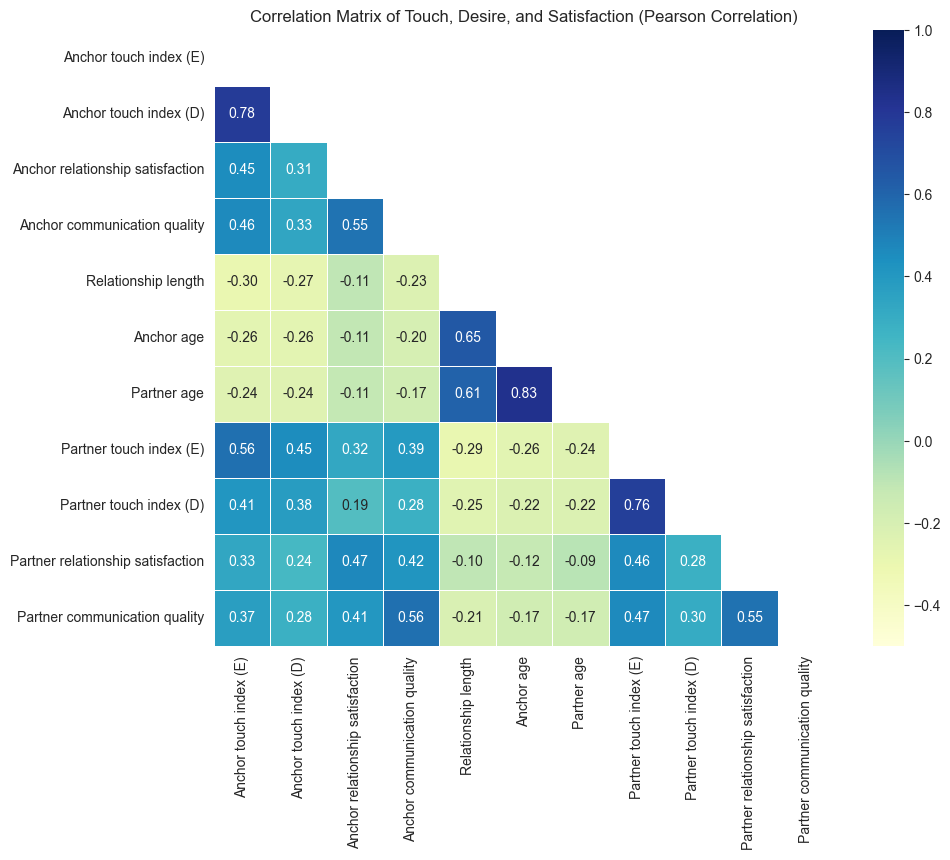

In [10]:
correlation_all = df[
    [
        'Anchor touch index (E)', 'Anchor touch index (D)',
        'Anchor relationship satisfaction', 'Anchor communication quality',
        'Relationship length', 'Anchor age', 'Partner age',
        'Partner touch index (E)', 'Partner touch index (D)',
        'Partner relationship satisfaction', 'Partner communication quality',

    ]
].corr()

matrix = np.triu(correlation_all)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_all, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, vmax=1, vmin=-0.5, mask=matrix)
plt.title('Correlation Matrix of Touch, Desire, and Satisfaction (Pearson Correlation)')
plt.grid(False)
plt.savefig("output/img/correlation_map.png", dpi=350, transparent=True)

Text(0.5, 0, 'Frequency of Touch')

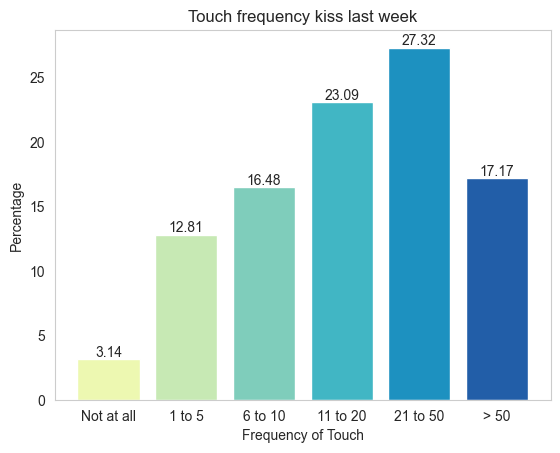

In [11]:
n = df['Anchor kiss (E)'].count()
m = df.groupby('Anchor kiss (E)')['Anchor kiss (E)'].count()
kiss_freq = pd.DataFrame({
    "Not at all": [round((m[0] * 100) / n, 2)],
    "1 to 5": [round((m[1] * 100) / n, 2)],
    "6 to 10": [round((m[2] * 100) / n, 2)],
    "11 to 20": [round((m[3] * 100) / n, 2)],
    "21 to 50": [round((m[4] * 100) / n, 2)],
    "> 50": [round((m[5] * 100) / n, 2)]
})
ax = sns.barplot(kiss_freq, palette="YlGnBu")
colors = ["#edf8b1", "#c7e9b4", "#7fcdbb", "#41b6c4", "#1d91c0", "#225ea8"]
multiplier = 0

for attribute, measurement in kiss_freq.items():
    offset = multiplier
    rects = ax.bar(offset, measurement, label=attribute, color=colors[multiplier])
    ax.bar_label(rects)
    multiplier += 1
plt.grid(False)
ax.set_title("Touch frequency kiss last week")
ax.set_ylabel("Percentage")
ax.set_xlabel("Frequency of Touch")


Text(0.5, 0, 'Frequency of Touch')

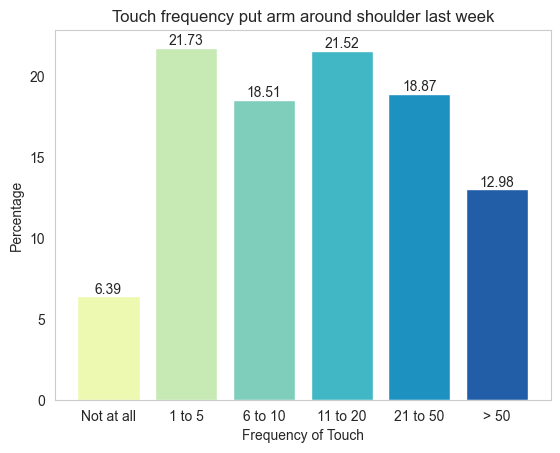

In [12]:
n = df['Anchor hold (E)'].count()
m = df.groupby('Anchor hold (E)')['Anchor hold (E)'].count()
hold_freq = pd.DataFrame({
    "Not at all": [round((m[0] * 100) / n, 2)],
    "1 to 5": [round((m[1] * 100) / n, 2)],
    "6 to 10": [round((m[2] * 100) / n, 2)],
    "11 to 20": [round((m[3] * 100) / n, 2)],
    "21 to 50": [round((m[4] * 100) / n, 2)],
    "> 50": [round((m[5] * 100) / n, 2)]
})
ax = sns.barplot(hold_freq, palette="YlGnBu")
colors = ["#edf8b1", "#c7e9b4", "#7fcdbb", "#41b6c4", "#1d91c0", "#225ea8"]
multiplier = 0

for attribute, measurement in hold_freq.items():
    offset = multiplier
    rects = ax.bar(offset, measurement, label=attribute, color=colors[multiplier])
    ax.bar_label(rects)
    multiplier += 1
plt.grid(False)
ax.set_title("Touch frequency put arm around shoulder last week")
ax.set_ylabel("Percentage")
ax.set_xlabel("Frequency of Touch")

Text(0.5, 0, 'Frequency of Touch')

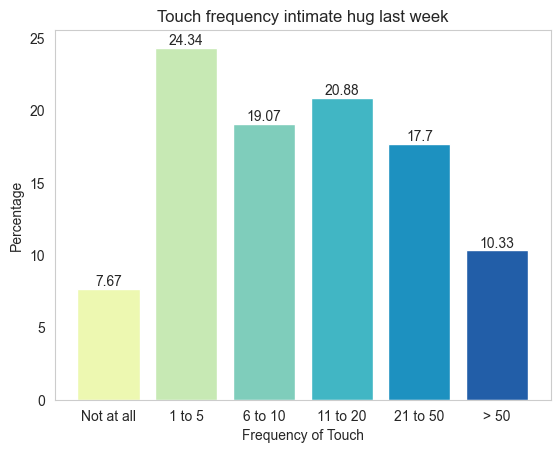

In [13]:
n = df['Anchor intimacy (E)'].count()
m = df.groupby('Anchor intimacy (E)')['Anchor intimacy (E)'].count()
hug_freq = pd.DataFrame({
    "Not at all": [round((m[0] * 100) / n, 2)],
    "1 to 5": [round((m[1] * 100) / n, 2)],
    "6 to 10": [round((m[2] * 100) / n, 2)],
    "11 to 20": [round((m[3] * 100) / n, 2)],
    "21 to 50": [round((m[4] * 100) / n, 2)],
    "> 50": [round((m[5] * 100) / n, 2)]
})
ax = sns.barplot(hug_freq, palette="YlGnBu")
colors = ["#edf8b1", "#c7e9b4", "#7fcdbb", "#41b6c4", "#1d91c0", "#225ea8"]
multiplier = 0

for attribute, measurement in hug_freq.items():
    offset = multiplier
    rects = ax.bar(offset, measurement, label=attribute, color=colors[multiplier])
    ax.bar_label(rects)
    multiplier += 1
plt.grid(False)
ax.set_title("Touch frequency intimate hug last week")
ax.set_ylabel("Percentage")
ax.set_xlabel("Frequency of Touch")

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Anchor touch index (E) vs. Anchor touch index (D): t-test independent samples, P_val:2.987e-01 t=-1.111e+00
Partner touch index (E) vs. Partner touch index (D): t-test independent samples, P_val:1.854e-01 t=-1.449e+00
Anchor touch index (E) vs. Partner touch index (E): t-test independent samples, P_val:8.380e-01 t=2.112e-01


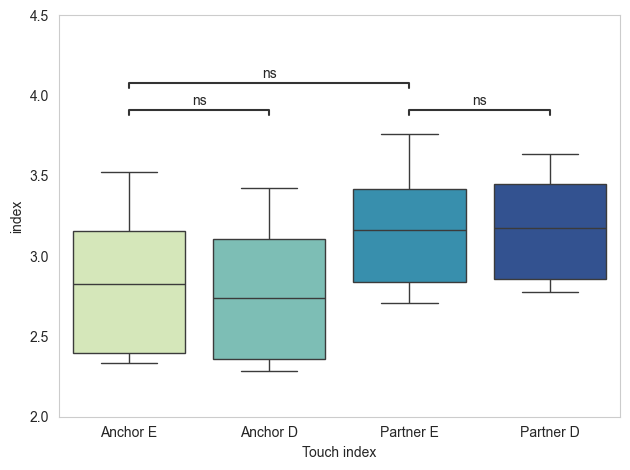

In [14]:
# Calculate means for touch variables
anchor_touch = df.groupby('Relationship length')[
    ['Anchor touch index (E)', 'Anchor touch index (D)']].mean().reset_index()
partner_touch = df.groupby('Relationship length')[
    ['Partner touch index (E)', 'Partner touch index (D)']].mean().reset_index()

dfs = [anchor_touch, partner_touch]

touch_indexes = reduce(lambda left, right: pd.merge(left, right, on=['Relationship length'],
                                                    how='outer'), dfs)

touch_indexes = touch_indexes.melt(id_vars='Relationship length',
                                   value_vars=['Anchor touch index (E)', 'Partner touch index (E)',
                                               'Anchor touch index (D)', 'Partner touch index (D)'],
                                   var_name='Touch index', value_name='index'
                                   )

ax = sns.boxplot(data=touch_indexes,
                 x='Touch index',
                 y='index',
                 hue='Touch index',
                 palette='YlGnBu',
                 )
pairs = [("Anchor touch index (E)", "Anchor touch index (D)"),
         ("Partner touch index (E)", "Partner touch index (D)"),
         ("Anchor touch index (E)", "Partner touch index (E)")]

annotator = Annotator(ax,
                      pairs,
                      data=touch_indexes,
                      x='Touch index',
                      y='index',
                      order=["Anchor touch index (E)", "Anchor touch index (D)", "Partner touch index (E)",
                             "Partner touch index (D)"])
annotator.configure(test='t-test_ind', text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.xticks([0, 1, 2, 3], labels=["Anchor E", "Anchor D", "Partner E", "Partner D"])
plt.ylim(2, 4.5)
plt.grid(False)
plt.tight_layout()
plt.savefig("output/img/touch_index_stats_all.png", dpi=350, transparent=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Anchor kiss (E) vs. Anchor kiss (D): t-test independent samples, P_val:3.706e-01 t=-9.486e-01
Partner kiss (E) vs. Partner kiss (D): t-test independent samples, P_val:2.545e-01 t=-1.228e+00
Anchor kiss (E) vs. Partner kiss (E): t-test independent samples, P_val:7.608e-01 t=3.151e-01


Text(0.5, 1.0, 'Kiss')

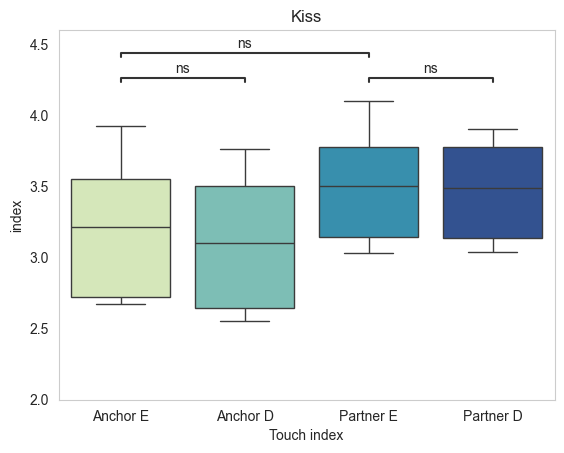

In [15]:
# Calculate means for touch variables
anchor_touch = df.groupby('Relationship length')[
    ['Anchor kiss (E)', 'Anchor kiss (D)']].mean().reset_index()
partner_touch = df.groupby('Relationship length')[
    ['Partner kiss (E)', 'Partner kiss (D)']].mean().reset_index()

dfs = [anchor_touch, partner_touch]

touch_indexes = reduce(lambda left, right: pd.merge(left, right, on=['Relationship length'],
                                                    how='outer'), dfs)

touch_indexes = touch_indexes.melt(id_vars='Relationship length',
                                   value_vars=['Anchor kiss (E)', 'Partner kiss (E)',
                                               'Anchor kiss (D)', 'Partner kiss (D)'],
                                   var_name='Touch index', value_name='index'
                                   )

ax = sns.boxplot(data=touch_indexes,
                 x='Touch index',
                 y='index',
                 hue='Touch index',
                 palette='YlGnBu',
                 )
pairs = [("Anchor kiss (E)", "Anchor kiss (D)"),
         ("Partner kiss (E)", "Partner kiss (D)"),
         ("Anchor kiss (E)", "Partner kiss (E)")]

annotator = Annotator(ax,
                      pairs,
                      data=touch_indexes,
                      x='Touch index',
                      y='index',
                      order=["Anchor kiss (E)", "Anchor kiss (D)", "Partner kiss (E)",
                             "Partner kiss (D)"])
annotator.configure(test='t-test_ind', text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.xticks([0, 1, 2, 3], labels=["Anchor E", "Anchor D", "Partner E", "Partner D"])
plt.ylim(2, 4.6)
plt.grid(False)
plt.title("Kiss")

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Anchor hold (E) vs. Anchor hold (D): t-test independent samples, P_val:2.411e-01 t=-1.266e+00
Partner hold (E) vs. Partner hold (D): t-test independent samples, P_val:1.318e-01 t=-1.678e+00
Anchor hold (E) vs. Partner hold (E): t-test independent samples, P_val:8.281e-01 t=2.244e-01


Text(0.5, 1.0, 'Hold arm')

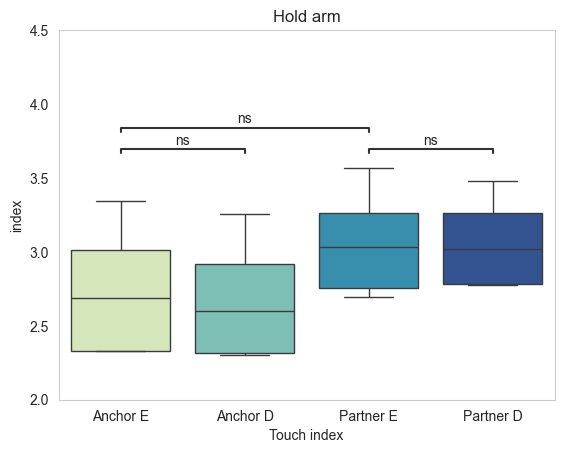

In [16]:
# Calculate means for touch variables
anchor_touch = df.groupby('Relationship length')[
    ['Anchor hold (E)', 'Anchor hold (D)']].mean().reset_index()
partner_touch = df.groupby('Relationship length')[
    ['Partner hold (E)', 'Partner hold (D)']].mean().reset_index()

dfs = [anchor_touch, partner_touch]

touch_indexes = reduce(lambda left, right: pd.merge(left, right, on=['Relationship length'],
                                                    how='outer'), dfs)

touch_indexes = touch_indexes.melt(id_vars='Relationship length',
                                   value_vars=['Anchor hold (E)', 'Partner hold (E)',
                                               'Anchor hold (D)', 'Partner hold (D)'],
                                   var_name='Touch index', value_name='index'
                                   )

ax = sns.boxplot(data=touch_indexes,
                 x='Touch index',
                 y='index',
                 hue='Touch index',
                 palette='YlGnBu',
                 )
pairs = [("Anchor hold (E)", "Anchor hold (D)"),
         ("Partner hold (E)", "Partner hold (D)"),
         ("Anchor hold (E)", "Partner hold (E)")]

annotator = Annotator(ax,
                      pairs,
                      data=touch_indexes,
                      x='Touch index',
                      y='index',
                      order=["Anchor hold (E)", "Anchor hold (D)", "Partner hold (E)",
                             "Partner hold (D)"])
annotator.configure(test='t-test_ind', text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.xticks([0, 1, 2, 3], labels=["Anchor E", "Anchor D", "Partner E", "Partner D"])
plt.ylim(2, 4.5)
plt.grid(False)
plt.title("Hold arm")

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Anchor intimacy (E) vs. Anchor intimacy (D): t-test independent samples, P_val:2.881e-01 t=-1.138e+00
Partner intimacy (E) vs. Partner intimacy (D): t-test independent samples, P_val:1.829e-01 t=-1.458e+00
Anchor intimacy (E) vs. Partner intimacy (E): t-test independent samples, P_val:9.260e-01 t=9.589e-02


Text(0.5, 1.0, 'Hug')

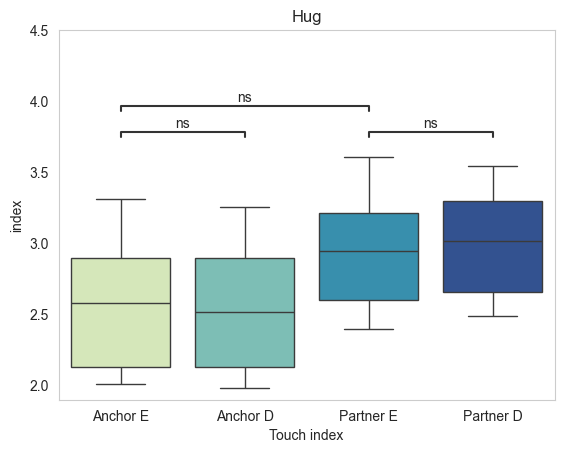

In [17]:
# Calculate means for touch variables
anchor_touch = df.groupby('Relationship length')[
    ['Anchor intimacy (E)', 'Anchor intimacy (D)']].mean().reset_index()
partner_touch = df.groupby('Relationship length')[
    ['Partner intimacy (E)', 'Partner intimacy (D)']].mean().reset_index()

dfs = [anchor_touch, partner_touch]

touch_indexes = reduce(lambda left, right: pd.merge(left, right, on=['Relationship length'],
                                                    how='outer'), dfs)

touch_indexes = touch_indexes.melt(id_vars='Relationship length',
                                   value_vars=['Anchor intimacy (E)', 'Partner intimacy (E)',
                                               'Anchor intimacy (D)', 'Partner intimacy (D)'],
                                   var_name='Touch index', value_name='index'
                                   )

ax = sns.boxplot(data=touch_indexes,
                 x='Touch index',
                 y='index',
                 hue='Touch index',
                 palette='YlGnBu',
                 )
pairs = [("Anchor intimacy (E)", "Anchor intimacy (D)"),
         ("Partner intimacy (E)", "Partner intimacy (D)"),
         ("Anchor intimacy (E)", "Partner intimacy (E)")]

annotator = Annotator(ax,
                      pairs,
                      data=touch_indexes,
                      x='Touch index',
                      y='index',
                      order=["Anchor intimacy (E)", "Anchor intimacy (D)", "Partner intimacy (E)",
                             "Partner intimacy (D)"])
annotator.configure(test='t-test_ind', text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.xticks([0, 1, 2, 3], labels=["Anchor E", "Anchor D", "Partner E", "Partner D"])
plt.ylim(1.9, 4.5)
plt.grid(False)
plt.title("Hug")

In [18]:
# # https://seaborn.pydata.org/examples/kde_ridgeplot.html
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
#
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(data=df,
#                   row='age-group (Anchor)',
#                   hue='age-group (Anchor)',
#                   aspect=15,
#                   height=0.5,
#                   # palette='YlGnBu',
#                   palette=pal
#                   )
# g.map(sns.kdeplot,
#       "Anchor kiss (E)",
#       bw_adjust=.5,
#       clip_on=False,
#       fill=True,
#       alpha=1,
#       linewidth=1.5)
# g.map(sns.kdeplot, "Anchor kiss (E)", color="w", clip_on=False, lw=2, bw_adjust=.5)
#
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
#
#
# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(1, .2, label, fontweight="bold", color=color,
#             ha="left", va="center", transform=ax.transAxes)
#
#
# g.figure.subplots_adjust(hspace=-.05)
#
# labels = ["<21", "21-30", "31-40", "41-50", ">50"]
# # g.map(label, "Anchor kiss (E)")
#
# g.set_titles("")
# g.set_xlabels("Kiss frequency")
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)


In [21]:
# Calculate means for touch variables
df_touch = df[[
    'Anchor age', 'Partner age', 'Relationship length', 'Anchor kiss (E)',
    'Anchor hold (E)', 'Anchor intimacy (E)', 'Anchor kiss (D)', 'Anchor hold (D)',
    'Anchor intimacy (D)', 'Partner kiss (E)', 'Partner hold (E)', 'Partner intimacy (E)',
    'Partner kiss (D)', 'Partner hold (D)', 'Partner intimacy (D)', 'age-group (Anchor)','age-group (Partner)'
]]
new_df = df_touch

df_touch = df_touch.groupby('Relationship length').mean().reset_index()

kissing = df_touch.melt(id_vars='Relationship length',
                        value_vars=['Anchor kiss (E)', 'Anchor kiss (D)', 'Partner kiss (E)', 'Partner kiss (D)'],
                        var_name='Touch index', value_name='Touch Freq'
                        )
holding = df_touch.melt(id_vars='Relationship length',
                        value_vars=['Anchor hold (E)', 'Anchor hold (D)', 'Partner hold (E)', 'Partner hold (D)'],
                        var_name='Touch index', value_name='Touch Freq'
                        )
hugging = df_touch.melt(id_vars='Relationship length',
                        value_vars=['Anchor intimacy (E)', 'Anchor intimacy (D)', 'Partner intimacy (E)',
                                    'Partner intimacy (D)'],
                        var_name='Touch index', value_name='Touch Freq'
                        )

In [22]:
sns.set_theme(style='white')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_Anchor kiss (E) vs. 1_Anchor kiss (D): t-test independent samples, P_val:9.936e-02 t=-1.655e+00
5_Anchor kiss (E) vs. 5_Anchor kiss (D): t-test independent samples, P_val:3.795e-03 t=-2.911e+00
1_Anchor kiss (E) vs. 5_Anchor kiss (E): t-test independent samples, P_val:4.050e-09 t=6.043e+00
1_Anchor kiss (D) vs. 5_Anchor kiss (D): t-test independent samples, P_val:3.389e-09 t=6.083e+00


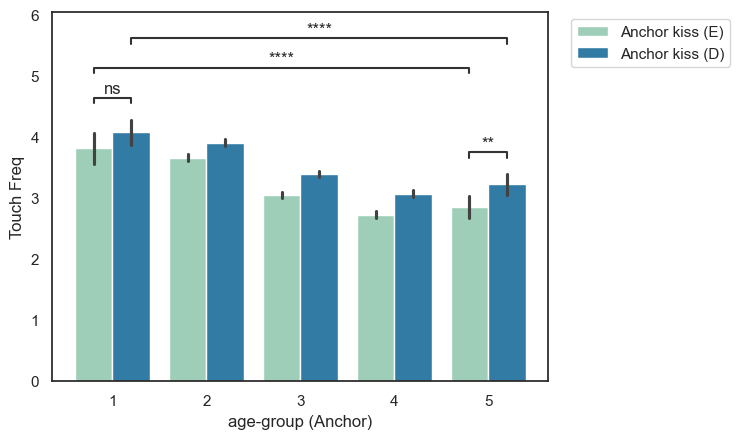

In [23]:
kissing = new_df.melt(id_vars='age-group (Anchor)',
                        value_vars=['Anchor kiss (E)', 'Anchor kiss (D)'],
                        var_name='Touch index', value_name='Touch Freq'
                        )

x = "age-group (Anchor)"
y = "Touch Freq"
hue = "Touch index"
hue_order=['Anchor kiss (E)', 'Anchor kiss (D)']
pairs=[
    ((1, "Anchor kiss (E)"), (1, "Anchor kiss (D)")),
    ((5, "Anchor kiss (E)"), (5, "Anchor kiss (D)")),
    ((1, "Anchor kiss (E)"), (5, "Anchor kiss (E)")),
    ((1, "Anchor kiss (D)"), (5, "Anchor kiss (D)"))
    ]
ax = sns.barplot(data=kissing, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu',)
annot = Annotator(ax, pairs, data=kissing, x=x, y=y, hue=hue, hue_order=hue_order)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_Partner kiss (E) vs. 1_Partner kiss (D): t-test independent samples, P_val:2.061e-01 t=-1.268e+00
5_Partner kiss (E) vs. 5_Partner kiss (D): t-test independent samples, P_val:7.663e-07 t=-4.971e+00
1_Partner kiss (E) vs. 5_Partner kiss (E): t-test independent samples, P_val:3.675e-10 t=6.357e+00
1_Partner kiss (D) vs. 5_Partner kiss (D): t-test independent samples, P_val:3.989e-08 t=5.553e+00


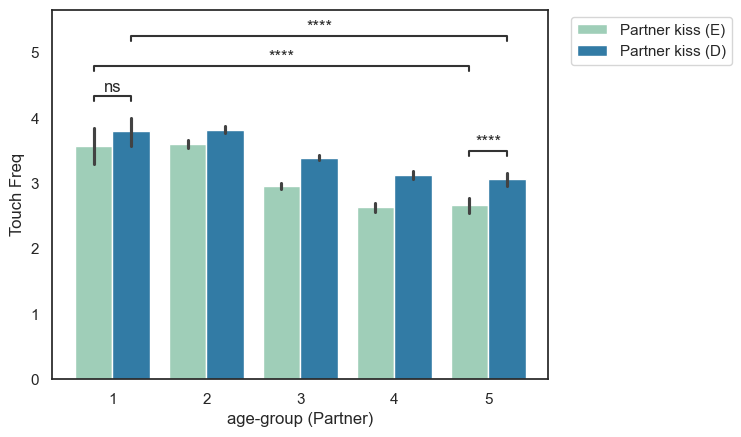

In [24]:
kissing = new_df.melt(id_vars='age-group (Partner)',
                        value_vars=['Partner kiss (E)', 'Partner kiss (D)'],
                        var_name='Touch index', value_name='Touch Freq'
                        )

x = "age-group (Partner)"
y = "Touch Freq"
hue = "Touch index"
hue_order=['Partner kiss (E)', 'Partner kiss (D)']
pairs=[
    ((1, "Partner kiss (E)"), (1, "Partner kiss (D)")),
    ((5, "Partner kiss (E)"), (5, "Partner kiss (D)")),
    ((1, "Partner kiss (E)"), (5, "Partner kiss (E)")),
    ((1, "Partner kiss (D)"), (5, "Partner kiss (D)"))
    ]
ax = sns.barplot(data=kissing, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu',)
annot = Annotator(ax, pairs, data=kissing, x=x, y=y, hue=hue, hue_order=hue_order)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

# ax = sns.barplot(
#     data=new_df,
#     x='Relationship length',
#     y='Touch Freq',
#     hue='Touch index',
#     palette='YlGnBu',
# )
# pairs = [("1.0 Anchor kiss (E)", "1.0 Anchor kiss (E)"),
#          ("5.0 Anchor kiss (E)", "5.0 Anchor kiss (E)")]
#
# annotator = Annotator(ax,
#                       pairs,
#                       data=new_df,
#                       x='Frequency',
#                       y='Touch Freq', )
# annotator.configure(test='t-test_ind', text_format='star')
# annotator.apply_and_annotate()

In [25]:
# import seaborn as sns
#
# from statannotations.Annotator import Annotator
#
# df = sns.load_dataset("tips")
# x = "day"
# y = "total_bill"
# order = ['Sun', 'Thur', 'Fri', 'Sat']
#
# ax = sns.boxplot(data=df, x=x, y=y, order=order)
#
# pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")]
#
# annotator = Annotator(ax, pairs, data=df, x=x, y=y, order=order)
# annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
# annotator.apply_and_annotate()

In [26]:
# sns.lineplot(data=df_touch,
#              x='Relationship length',
#              y='Anchor kiss (E)',
#              color='#225ea8',
#              linestyle='-',
#              label='Anchor kiss'
#              )
#
# sns.lineplot(data=df_touch,
#              x='Relationship length',
#              y='Anchor kiss (D)',
#              color='#225ea8',
#              linestyle='--',
#              label='Anchor kiss'
#              )
#
# sns.lineplot(data=df_touch,
#              x='Relationship length',
#              y='Partner kiss (E)',
#              color='#41b6c4',
#              linestyle='-',
#              label='Partner kiss'
#              )
#
# sns.lineplot(data=df_touch,
#              x='Relationship length',
#              y='Partner kiss (D)',
#              color='#41b6c4',
#              linestyle='--',
#              label='Partner kiss',
#              markers=True
#              )
# plt.xticks([1, 2, 3, 4, 5])
# plt.xlim(0.5, 5.5)



(0.5, 5.5)

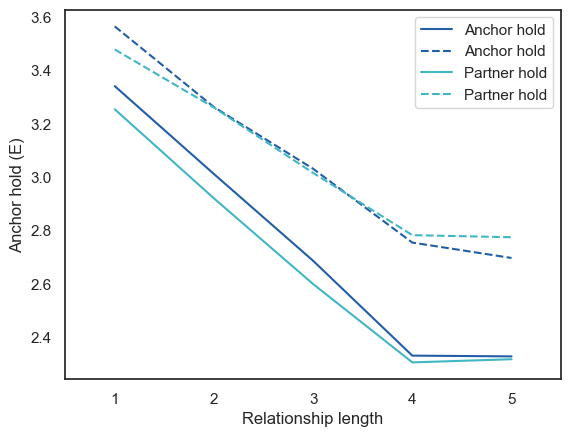

In [27]:
sns.lineplot(data=df_touch,
             x='Relationship length',
             y='Anchor hold (E)',
             color='#225ea8',
             linestyle='-',
             label='Anchor hold'
             )

sns.lineplot(data=df_touch,
             x='Relationship length',
             y='Anchor hold (D)',
             color='#225ea8',
             linestyle='--',
             label='Anchor hold'
             )

sns.lineplot(data=df_touch,
             x='Relationship length',
             y='Partner hold (E)',
             color='#41b6c4',
             linestyle='-',
             label='Partner hold'
             )

sns.lineplot(data=df_touch,
             x='Relationship length',
             y='Partner hold (D)',
             color='#41b6c4',
             linestyle='--',
             label='Partner hold'
             )
plt.xticks([1, 2, 3, 4, 5])
plt.xlim(0.5, 5.5)

(0.5, 5.5)

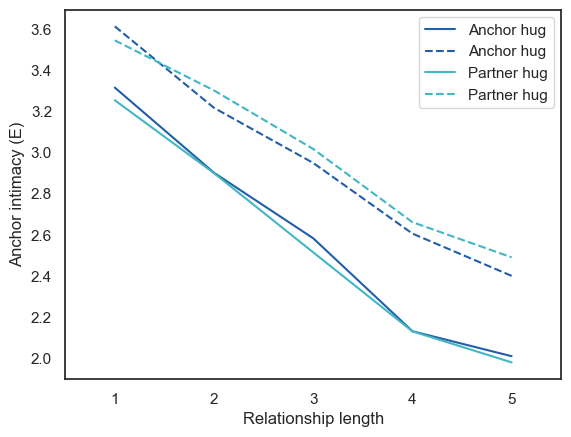

In [28]:
sns.lineplot(data=df_touch,
             x='Relationship length',
             y='Anchor intimacy (E)',
             color='#225ea8',
             linestyle='-',
             label='Anchor hug'
             )

sns.lineplot(data=df_touch,
             x='Relationship length',
             y='Anchor intimacy (D)',
             color='#225ea8',
             linestyle='--',
             label='Anchor hug'
             )

sns.lineplot(data=df_touch,
             x='Relationship length',
             y='Partner intimacy (E)',
             color='#41b6c4',
             linestyle='-',
             label='Partner hug'
             )

sns.lineplot(data=df_touch,
             x='Relationship length',
             y='Partner intimacy (D)',
             color='#41b6c4',
             linestyle='--',
             label='Partner hug'
             )
plt.xticks([1, 2, 3, 4, 5])
plt.xlim(0.5, 5.5)

ValueError: Could not interpret value `Relationship length` for `x`. An entry with this name does not appear in `data`.

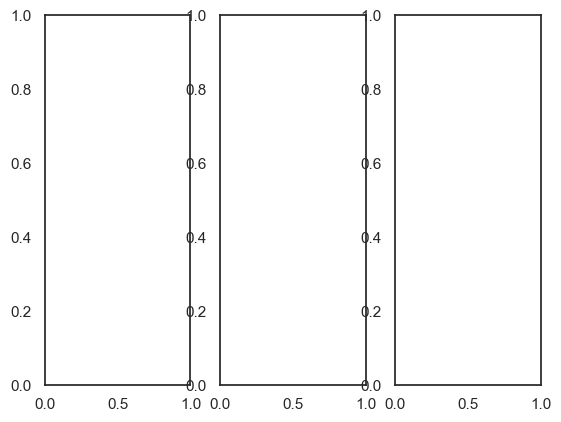

In [29]:
fig, ax = plt.subplots(1, 3)
sns.lineplot(
    data=kissing,
    x='Relationship length',
    y='Touch Freq',
    hue='Touch index',
    style='Touch index',
    palette='YlGnBu',
    markers=True, dashes=False,
    ax=ax[0]
)

sns.lineplot(
    data=holding,
    x='Relationship length',
    y='Touch Freq',
    hue='Touch index',
    style='Touch index',
    palette='YlGnBu',
    markers=True, dashes=False,
    ax=ax[1]
)

sns.lineplot(
    data=hugging,
    x='Relationship length',
    y='Touch Freq',
    hue='Touch index',
    style='Touch index',
    palette='YlGnBu',
    markers=True, dashes=False,
    ax=ax[2]
)
ax[0].set_ylim(1, 5), ax[0].set_xticks([1, 2, 3, 4, 5]), ax[0].legend(loc="lower center")
ax[1].set_ylim(1, 5), ax[1].set_xticks([1, 2, 3, 4, 5]), ax[1].legend(loc="lower center")
ax[2].set_ylim(1, 5), ax[2].set_xticks([1, 2, 3, 4, 5]), ax[2].legend(loc="lower center")
plt.tight_layout()
fig.set_dpi(150)
#

In [30]:
for i in range(0, len(df)):
    # --- Kiss --- #
    if df['Anchor kiss (E)'][i] == df['Partner kiss (E)'][i]:
        df.loc[i, "kiss_diff"] = 0

    if df['Anchor kiss (E)'][i] > df['Partner kiss (E)'][i]:
        df.loc[i, "kiss_diff"] = 1

    if df['Anchor kiss (E)'][i] < df['Partner kiss (E)'][i]:
        df.loc[i, "kiss_diff"] = -1

    if (df['Anchor kiss (E)'][i] > df['Partner kiss (E)'][i]) and (
            df['Anchor kiss (E)'][i] - df['Partner kiss (E)'][i]) > 2:
        df.loc[i, "kiss_diff"] = 2

    if (df['Anchor kiss (E)'][i] < df['Partner kiss (E)'][i]) and (
            df['Anchor kiss (E)'][i] - df['Partner kiss (E)'][i]) < -2:
        df.loc[i, "kiss_diff"] = -2

    # --- Hold --- #
    if df['Anchor hold (E)'][i] == df['Partner hold (E)'][i]:
        df.loc[i, "hold_diff"] = 0

    if df['Anchor hold (E)'][i] > df['Partner hold (E)'][i]:
        df.loc[i, "hold_diff"] = 1

    if df['Anchor hold (E)'][i] < df['Partner hold (E)'][i]:
        df.loc[i, "hold_diff"] = -1

    if (df['Anchor hold (E)'][i] > df['Partner hold (E)'][i]) and (
            df['Anchor hold (E)'][i] - df['Partner hold (E)'][i]) > 2:
        df.loc[i, "hold_diff"] = 2

    if (df['Anchor hold (E)'][i] < df['Partner hold (E)'][i]) and (
            df['Anchor hold (E)'][i] - df['Partner hold (E)'][i]) < -2:
        df.loc[i, "hold_diff"] = -2

    # --- Intimacy (Hug) --- #
    if df['Anchor intimacy (E)'][i] == df['Partner intimacy (E)'][i]:
        df.loc[i, "hug_diff"] = 0

    if df['Anchor intimacy (E)'][i] > df['Partner intimacy (E)'][i]:
        df.loc[i, "hug_diff"] = 1

    if df['Anchor intimacy (E)'][i] < df['Partner intimacy (E)'][i]:
        df.loc[i, "hug_diff"] = -1

    if (df['Anchor intimacy (E)'][i] > df['Partner intimacy (E)'][i]) and (
            df['Anchor intimacy (E)'][i] - df['Partner intimacy (E)'][i]) > 2:
        df.loc[i, "hug_diff"] = 2

    if (df['Anchor intimacy (E)'][i] < df['Partner intimacy (E)'][i]) and (
            df['Anchor intimacy (E)'][i] - df['Partner intimacy (E)'][i]) < -2:
        df.loc[i, "hug_diff"] = -2

    # --- Overall --- #
    if df['Anchor touch discrepancy'][i] == df['Partner touch discrepancy'][i]:
        df.loc[i, "overall_diff"] = 0

    if df['Anchor touch discrepancy'][i] > df['Partner touch discrepancy'][i]:
        df.loc[i, "overall_diff"] = 1

    if df['Anchor touch discrepancy'][i] < df['Partner touch discrepancy'][i]:
        df.loc[i, "overall_diff"] = -1

    if (df['Anchor touch discrepancy'][i] > df['Partner touch discrepancy'][i]) and (
            df['Anchor touch discrepancy'][i] - df['Partner touch discrepancy'][i]) > 2:
        df.loc[i, "overall_diff"] = 2

    if (df['Anchor touch discrepancy'][i] < df['Partner touch discrepancy'][i]) and (
            df['Anchor touch discrepancy'][i] - df['Partner touch discrepancy'][i]) < -2:
        df.loc[i, "overall_diff"] = -2



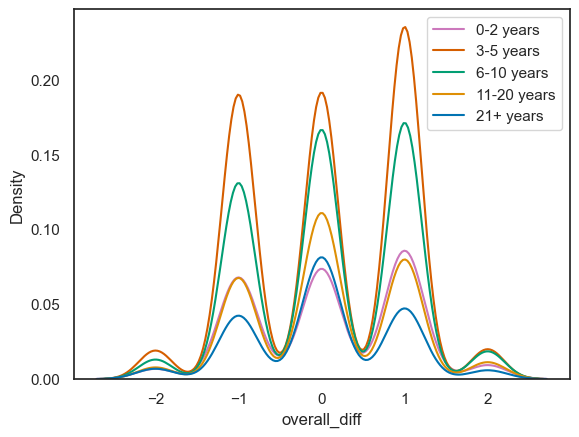

In [32]:

fig, ax = plt.subplots()
# sns.histplot(
#     data=df,
#     x="overall_diff",
#     hue="Relationship length",
#     multiple="dodge",
#     discrete=True,
#     shrink=.8,
#     palette='YlGnBu'
# )
sns.kdeplot(
    data=df,
    x="overall_diff",
    hue="Relationship length",
    palette='colorblind',
)

ax.legend(labels=["0-2 years",
                  "3-5 years",
                  "6-10 years",
                  "11-20 years",
                  "21+ years"])
ax.grid(False)
plt.savefig("output/img/KDE.png", dpi=350, transparent=True)

<Axes: xlabel='Anchor relationship satisfaction', ylabel='Count'>

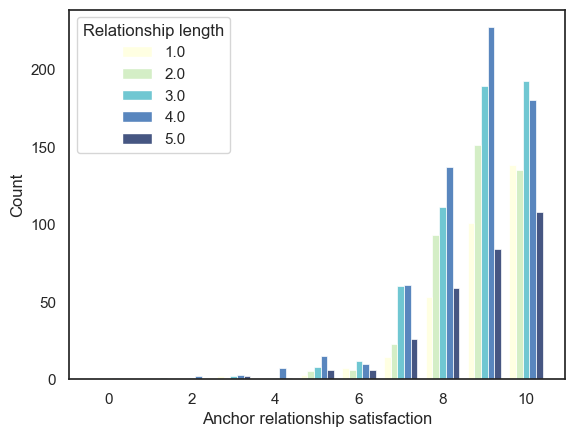

In [96]:
df_kiss = df[df["kiss_diff"] == 0]
df_hold = df[df["hold_diff"] == 0]
df_hug = df[df["hug_diff"] == 0]
df_overall = df[df["overall_diff"] == 0]

sns.histplot(
    data=df_overall,
    x="Anchor relationship satisfaction",
    hue="Relationship length",
    multiple="dodge",
    discrete=True,
    shrink=.8,
    palette='YlGnBu'
)

<Axes: xlabel='Anchor relationship satisfaction', ylabel='Count'>

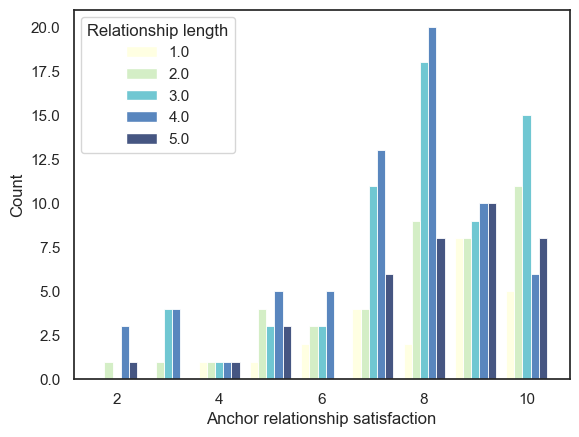

In [97]:
df_overall = df[df["overall_diff"] == 2]

sns.histplot(
    data=df_overall,
    x="Anchor relationship satisfaction",
    hue="Relationship length",
    multiple="dodge",
    discrete=True,
    shrink=.8,
    palette='YlGnBu'
)

<Axes: xlabel='Anchor relationship satisfaction', ylabel='Count'>

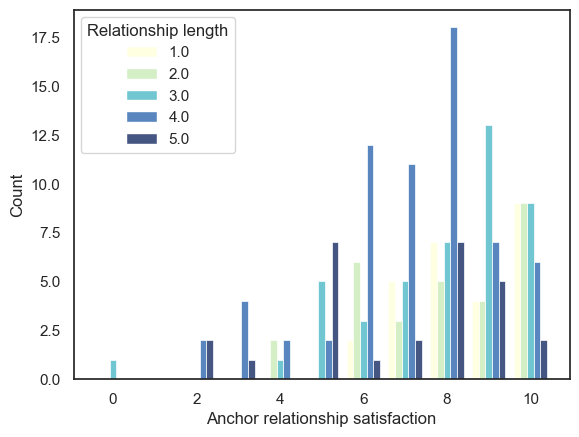

In [97]:
df_overall = df[df["overall_diff"] == -2]

sns.histplot(
    data=df_overall,
    x="Anchor relationship satisfaction",
    hue="Relationship length",
    multiple="dodge",
    discrete=True,
    shrink=.8,
    palette='YlGnBu'
)

([<matplotlib.axis.XTick at 0x29d6912fc20>,
 [Text(1, 0, '0-2 years'),
  Text(2, 0, '3-5 years'),
  Text(3, 0, '6-10 years'),
  Text(4, 0, '11-20 years'),
  Text(5, 0, '21+ years')])

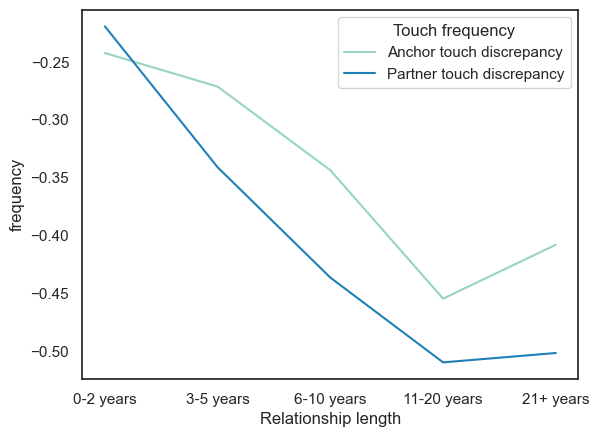

In [98]:
# df_touch = df[[
#     'age', 'page', 'Relationship length', 'Anchor kiss (E)',
#     'Anchor hold (E)', 'Anchor intimacy (E)', 'Anchor kiss (D)', 'Anchor hold (D)',
#     'Anchor intimacy (D)', 'Partner kiss (E)', 'Partner hold (E)', 'Partner intimacy (E)',
#     'Partner kiss (D)', 'Partner hold (D)', 'Partner intimacy (D)'
# ]]
#
# df_touch = df_touch.groupby('Relationship length').mean().reset_index()
#
# anchor_dis = df.groupby('Relationship length')['Anchor overall discrepancy'].mean().reset_index()
# partner_dis = df.groupby('Relationship length')['Partner overall discrepancy'].mean().reset_index()
#
# discrepancy = reduce(lambda left, right: pd.merge(left, right, on=['Relationship length'],
#                                                   how='outer'), [anchor_dis, partner_dis])

discrepancy = df.groupby('Relationship length')[[
    'Anchor touch discrepancy', 'Partner touch discrepancy']].mean().reset_index()

discrepancy = discrepancy.melt(
    id_vars='Relationship length',
    value_vars=['Anchor touch discrepancy', 'Partner touch discrepancy'],
    var_name='Touch frequency',
    value_name='frequency'
)

sns.lineplot(data=discrepancy,
             x='Relationship length',
             y='frequency',
             hue='Touch frequency',
             palette='YlGnBu'
             )

plt.xticks([1, 2, 3, 4, 5],
           ["0-2 years", "3-5 years", "6-10 years", "11-20 years", "21+ years"]
           )

Following "User's guide to correlation coefficients" (https://pmc.ncbi.nlm.nih.gov/articles/PMC6107969/)

1. There is a Strong correlation between touch experienced and touch desired for both Anchor (0.82) and Partner (0.81)
2. There is a Moderate correlation for communication quality between anchor and partner (0,56)
3. There is a Moderate correlation for experienced touch between anchor and partner (0.54)
4. There is a Moderate correlation between partner relationship satisfaction and communication quality (0,46)
5. There is a Moderate correlation between partner experienced touch and anchor desired touch (0,45)
6. There is a Moderate correlation between anchor experienced touch and partner desired touch (0,43)
7. There is a Moderate correlation between touch experienced and perceived communication quality within the relationship for the anchor (0.43)
8. There is a Moderate correlation between anchor desired touch and partner desired touch (0,40)

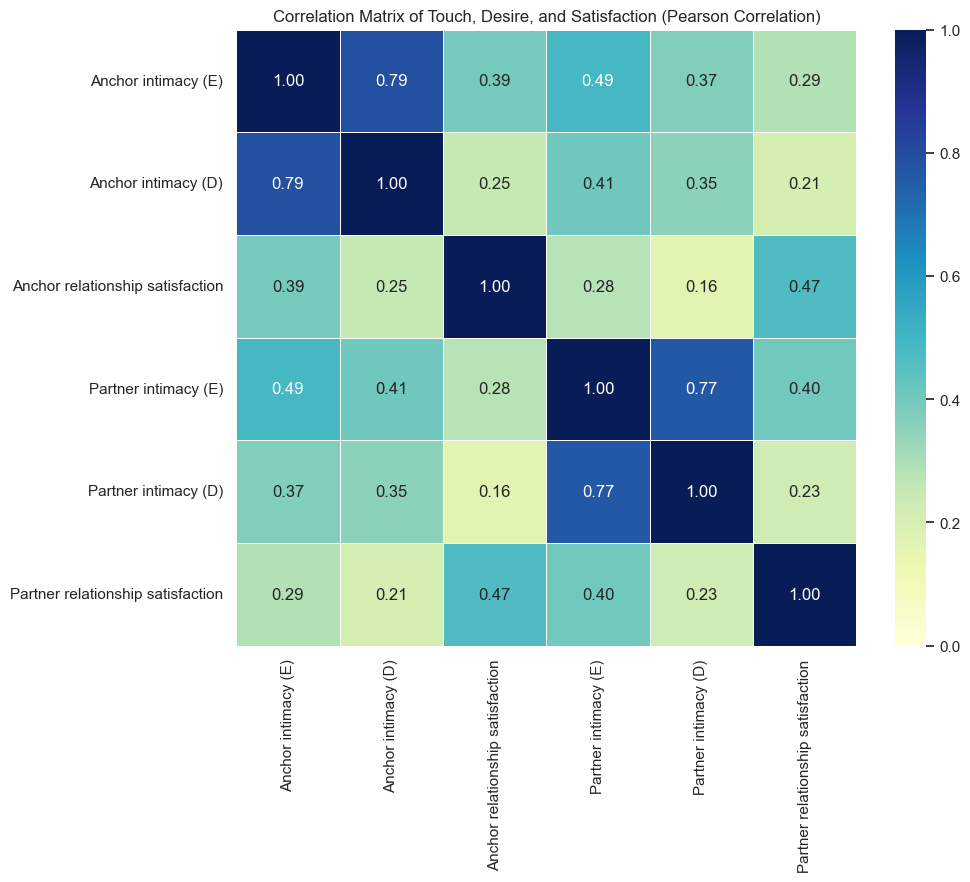

In [99]:
correlation_matrix = df[
    [
        'Anchor intimacy (E)', 'Anchor intimacy (D)',
        'Anchor relationship satisfaction',
        'Partner intimacy (E)', 'Partner intimacy (D)',
        'Partner relationship satisfaction',
    ]
].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, vmin=0, vmax=1)
plt.title('Correlation Matrix of Touch, Desire, and Satisfaction (Pearson Correlation)')
plt.show()

From Yvonee

Key predictors of higher touch frequency were
1. higher relationship satisfaction
2. more positive communication
3. shorter relationship duration
4. the absence of children
5. living together
6. younger age